# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing  # New dataset


# Load and Read the Data

In [2]:
# Load California Housing data
california = fetch_california_housing()

# Convert data to DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target column (house prices)
data['PRICE'] = california.target

# Display the first 5 rows of the data
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


# Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


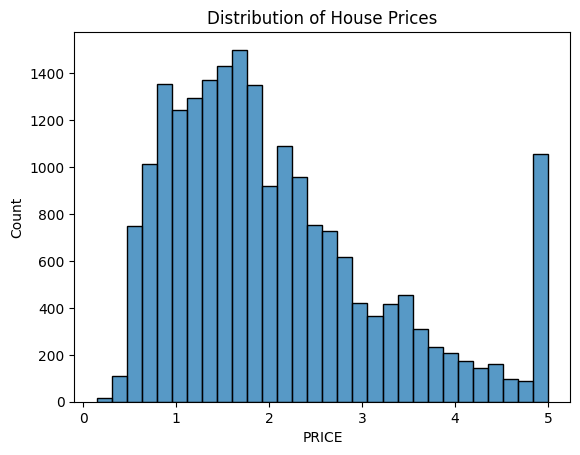

In [3]:
# Information about the data
print(data.info())

# Descriptive statistics
print(data.describe())

# Visualize the distribution of house prices
sns.histplot(data['PRICE'], bins=30)
plt.title('Distribution of House Prices')
plt.show()


# Data Cleaning

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
# Assuming 'MedInc' is a column in your DataFrame
Q1 = data['MedInc'].quantile(0.25)
Q3 = data['MedInc'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data = data[~((data['MedInc'] < (Q1 - 1.5 * IQR)) | (data['MedInc'] > (Q3 + 1.5 * IQR)))]

print(data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')


# Visualization

- To visualize the data and understand its distribution and patterns, we can use matplotlib and seaborn

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


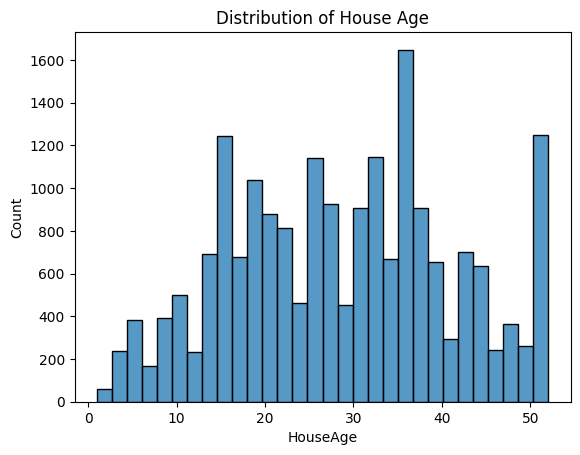

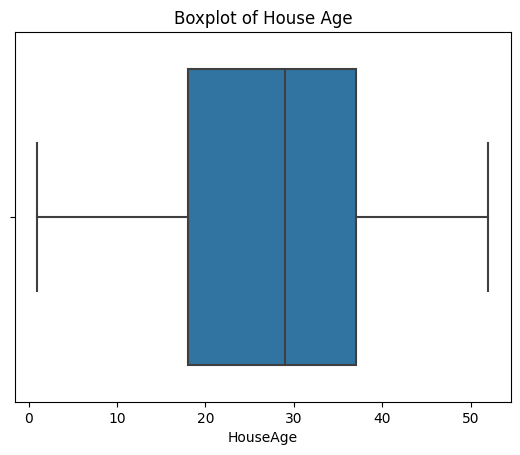

In [6]:
# Check the distribution of the HouseAge column
sns.histplot(data['HouseAge'], bins=30)  # Plot the distribution of house ages
plt.title('Distribution of House Age')
plt.show()

# Plot a boxplot for the HouseAge column
sns.boxplot(x=data['HouseAge'])  # Boxplot to identify outliers
plt.title('Boxplot of House Age')
plt.show()

# Feature Extraction (Optional)

In [7]:
# Creating a new feature: the ratio of average rooms to average bedrooms
data['RoomBedRatio'] = data['AveRooms'] / data['AveBedrms']
print(data.head())  # Display the first few rows to verify the new feature

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   

   Longitude  PRICE  RoomBedRatio  
2    -122.24  3.521      7.721053  
3    -122.25  3.413      5.421277  
4    -122.25  3.422      5.810714  
5    -122.25  2.697      4.314554  
6    -122.25  2.992      5.184049  


# Split Data into X and Y

In [8]:
# Split data into features (X) and target (y)
X = data.drop('PRICE', axis=1)  # Features
y = data['PRICE']  # Target variable

# Preprocessing

-   Preprocessing involves converting categorical values to numeric and scaling the data:

-   Encoding Categorical Variables:

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Print available columns to verify the categorical column name
print(data.columns)

# Check if the column 'ocean_proximity' exists
if 'ocean_proximity' in data.columns:
    # Encode the 'ocean_proximity' column
    data['ocean_proximity'] = le.fit_transform(data['ocean_proximity'])
    print(data.head())  # Display the first few rows to verify the encoding
else:
    print("The column 'ocean_proximity' does not exist in the dataset.")
    # Add any alternative steps or modifications you need here


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE', 'RoomBedRatio'],
      dtype='object')
The column 'ocean_proximity' does not exist in the dataset.


-   Scaling Data

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Train and Test Sets

-   We split the data into training and testing sets to evaluate the model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Model

-   We train the model using different algorithms; for example, the Linear Regression algorithm

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Check Accuracy

-   We evaluate the model's performance using the test data

In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.5589079046779543


# Hyperparameter Tuning

-   Using Grid Search or Cross Validation to optimize the model's performance

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline to include scaling and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('regressor', LinearRegression())  # Linear Regression model
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False]  # Only optimize fit_intercept
}

# Set up GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)


Best Parameters: {'regressor__fit_intercept': True}


# Save Model

-   We can save the final model for future use using the joblib library

In [15]:
import joblib

joblib.dump(model, 'model.pkl')


['model.pkl']

**This provides a comprehensive guide for building a machine learning model from start to finish**